<a href="https://colab.research.google.com/github/sarthak20574/ML-Prediction-System-for-Salary-of-a-Graduate/blob/main/ML_proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/work/OnlineNewsPopularity.csv')
new_names = ['url']
for i in range(1, len(df.columns)):
    new_names.append(df.columns[i][1:])
df.columns = new_names
plt_df = pd.read_csv('/content/drive/MyDrive/work/OnlineNewsPopularity.csv')

In [ ]:
df = df[df.timedelta >= 14]

In [ ]:
x = df.iloc[:, 2:-1].values
y = df.iloc[:, -1].values

In [ ]:
# finding the 1st quartile
q1 = np.quantile(y, 0.25)
 
# finding the 3rd quartile
q3 = np.quantile(y, 0.75)
med = np.median(y)
 
# finding the iqr region
iqr = q3-q1
 
# finding upper and lower whiskers
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
print(iqr, upper_bound, lower_bound)

1856.0 5584.0 -1840.0


In [ ]:
outliers = y[(y <= lower_bound) | (y >= upper_bound)]
df['shares'].loc[df['shares'] > upper_bound] = upper_bound

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(21,14))
sb.heatmap(plt_df.iloc[:, 2:].corr(),xticklabels = True, yticklabels = True)

In [ ]:
df.drop(['n_non_stop_unique_tokens', 'n_non_stop_words','kw_max_min', 'kw_max_max'],axis = 1, inplace = True)

In [ ]:
x = df.iloc[:, 2:-1].values
y = df.iloc[:, -1].values

In [ ]:
df

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39426,http://mashable.com/2014/12/22/window-washer-f...,14.0,11.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000,0.000000,0.450000,0.050000,0.050000,0.050000,2300
39427,http://mashable.com/2014/12/22/winter-solstice...,14.0,11.0,820.0,0.497512,1.0,0.684318,12.0,8.0,3.0,...,0.062500,0.8,-0.220380,-1.000,-0.050000,0.000000,-0.200000,0.500000,0.200000,1200
39428,http://mashable.com/2014/12/23/18-tv-shows-to-...,14.0,11.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000,0.000000,0.600000,-0.200000,0.100000,0.200000,1200
39429,http://mashable.com/2014/12/23/acing-job-inter...,14.0,9.0,952.0,0.442797,1.0,0.680723,14.0,0.0,1.0,...,0.033333,1.0,-0.381661,-1.000,-0.050000,0.000000,0.000000,0.500000,0.000000,1200


In [ ]:
df.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39431.000000,39431.000000,39431.000000,39431.000000,39431.000000,39431.000000,39431.000000,39431.000000,39431.000000,39431.000000,...,39431.000000,39431.000000,39431.000000,39431.000000,39431.000000,39431.000000,39431.000000,39431.000000,39431.000000,39431.000000
mean,356.388654,10.394081,546.577109,0.548610,0.997007,0.689610,10.884634,3.296772,4.551596,1.252263,...,0.095498,0.757221,-0.259567,-0.521908,-0.107581,0.282399,0.071489,0.341947,0.156041,2120.204839
std,213.239790,2.111761,471.382950,3.530177,5.245289,3.273578,11.329065,3.857575,8.324116,4.110389,...,0.071368,0.247362,0.127666,0.290166,0.095450,0.324351,0.265387,0.188727,0.226256,1623.012422
min,14.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,168.000000,9.000000,246.000000,0.470968,1.000000,0.625786,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328333,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,944.000000
50%,342.000000,10.000000,409.000000,0.539326,1.000000,0.690583,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,545.000000,12.000000,716.000000,0.608838,1.000000,0.755000,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.187007,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,5584.000000


In [ ]:
df.isnull().sum()

url                             0
timedelta                       0
n_tokens_title                  0
n_tokens_content                0
n_unique_tokens                 0
                               ..
title_subjectivity              0
title_sentiment_polarity        0
abs_title_subjectivity          0
abs_title_sentiment_polarity    0
shares                          0
Length: 61, dtype: int64

In [ ]:
url_list = plt_df.iloc[:, 0]              #dividing them into slices for easier plotting
features = plt_df.iloc[:, 2:-1]
labels = plt_df.iloc[:,-1]

In [ ]:
for i in range(len(labels)):          #converting into a classification of 3 groups
  if labels.iloc[i] <=700:
    labels.at[i] = "poor"
  elif labels.iloc[i] <= 2800:
    labels.at[i] = "good"
  else:
    labels.at[i] = "amazing"

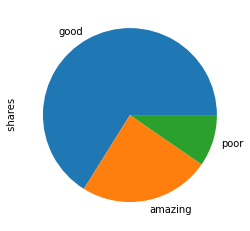

In [ ]:
labels.value_counts().plot(kind='pie')

In [ ]:
plt.figure(figsize=(21,14))                                       #boxplots for the first 4 features
plt.subplot(221)
sb.boxplot(data=plt_df, x=plt_df.iloc[:, 2], y = plt_df.iloc[:, -1])
plt.subplot(222)
sb.boxplot(data=plt_df, x=plt_df.iloc[:, 3], y = plt_df.iloc[:, -1])
plt.subplot(223)
sb.boxplot(data=plt_df, x=plt_df.iloc[:, 4], y = plt_df.iloc[:, -1])
plt.subplot(224)
sb.boxplot(data=plt_df, x=plt_df.iloc[:, 5], y = plt_df.iloc[:, -1])

KeyboardInterrupt: ignored

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f8972f3a8b0> (for post_execute):


KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7f8971e264c0> (for post_execute):


KeyboardInterrupt: ignored

**EDA**

* There are no null values present in the data.
* We have a highly inbalanced data, as we can infer from the boxplots.
* There are 39644 rows and 61 columns, out of the said columns, there are 58 predictive columns, 2 non predictive columns and 1 goal field.
* After converting the values of shares into classes we can see that they are severely spread out on one side, i.e., we have a lot of outliers.
* From the heatmap we can see that the features do not co-relate to each other much, with most of the pairs having a correlation value around 0.


In [ ]:
def normalize(arr):
	for i in range(0,np.shape(arr)[1]):
		if (np.std(arr[:,i])!=0): #because of the column of ones
			arr[:,i] = ((arr[:,i] - np.mean(arr[:,i]))/np.std(arr[:, i]))
def normalize_y(arr):
	for i in range(0,np.shape(arr)[1]-1):
		if (np.std(arr[:,i])!=0): #because of the column of ones
			arr[:,i] = ((arr[:,i] - np.mean(arr[:,i]))/np.std(arr[:, i]))

In [ ]:
str_arr = np.array(df.iloc[:,0])
shares_arr = np.array(df.iloc[:,-1])
import re
for i in range(len(str_arr)):
    str_arr[i] = re.sub(r'https?\:\/\/mashable.com\/[0-9]+\/[0-9]+\/[0-9]+\/',r'',str_arr[i])
    str_arr[i] = re.sub(r'\-', r' ', str_arr[i])
    str_arr[i] = re.sub(r'(\s|^)[0-9]+($|\s)', r' ', str_arr[i])
    str_arr[i] = str_arr[i][:-1]

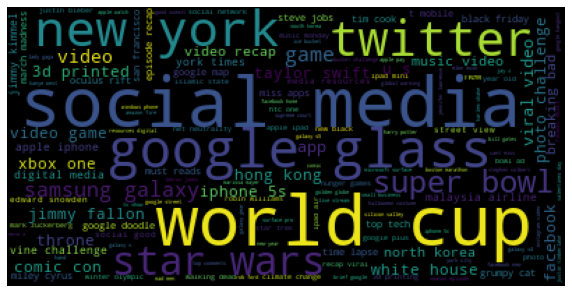

In [ ]:
token_titles=[]
import math
for i in range(len(str_arr)):
    arr_t = str_arr[i].split(' ')
    for j in range(int(math.log(shares_arr[i]))):
        token_titles.append(arr_t)
flattened_list = []
for  i in range(len(token_titles)):
  for j in token_titles[i]:
    flattened_list.append(j)
from wordcloud import WordCloud
import matplotlib.pyplot as plt
def gen_wc(word_arr):
    wordcloud = WordCloud(max_font_size=50, scale=1).generate(" ".join(word_arr))
    fig = plt.figure(figsize=(10, 10))
    plt.axis('off')
    plt.imshow(wordcloud)
    plt.show()
gen_wc(flattened_list)

Regression

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

reg1 =LinearRegression()
reg1.fit(x_train, y_train)
pred = (reg1.predict(x_test))

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
reg2 = GridSearchCV(Lasso(), {'alpha':np.linspace(0.1,0.5,10)})
reg2.fit(x_train, y_train)
print(reg2.score(x_train, y_train))
y_pred = reg1.predict(x_train)
print(mean_squared_error(y_train, y_pred, squared = False))
reg3 = GridSearchCV(Ridge(), {'alpha':np.linspace(0,200,11)})
reg3.fit(x_train, y_train)
print(reg3.score(x_test, y_test))
y_pred = reg1.predict(x_test)
print(mean_squared_error(y_test, y_pred, squared = False))

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.922e+10, tolerance: 6.661e+06
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.576e+10, tolerance: 6.675e+06
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.921e+10, tolerance: 6.674e+06

0.11903038208066541
1525.5877772950898
0.1152266477357804
1517.6748674872233


Classification

In [ ]:
#d_arr = np.array(df.iloc[:,1:])
#from sklearn.preprocessing import RobustScaler
#transformer = RobustScaler().fit(d_arr)
#d_arr = transformer.transform(d_arr)
#normalize(d_arr)
#x = d_arr[:,:-1]
#y = d_arr[:,-1]
for i in range(np.shape(y)[0]):
    if (y[i]<1400):
        y[i] = 0
    else:
        y[i] = 1

In [ ]:
for i in range(len(pred)):
    if pred[i]<0:
        pred[i] = 0
    else:
        pred[i] = 1

In [ ]:
count = 0
for i in range(len(pred)):
    if (pred[i]==y_test[i]):
        count+=1
print(count/len(pred))

0.0


In [ ]:
print(y)

[0 0 1 ... 0 0 1]


In [ ]:
print(np.shape(x))

(39431, 58)


In [ ]:
import sklearn
from sklearn.feature_selection import SelectKBest,chi2
skb = SelectKBest(k=30)
x_new = skb.fit_transform(x, y)
print(skb.get_feature_names_out(df.columns[2:-1]))

['n_tokens_title' 'num_hrefs' 'num_keywords'
 'data_channel_is_entertainment' 'data_channel_is_socmed'
 'data_channel_is_tech' 'data_channel_is_world' 'kw_min_min' 'kw_avg_min'
 'kw_min_max' 'kw_avg_max' 'kw_min_avg' 'kw_max_avg' 'kw_avg_avg'
 'weekday_is_tuesday' 'weekday_is_wednesday' 'weekday_is_thursday'
 'weekday_is_saturday' 'is_weekend' 'LDA_00' 'LDA_01' 'LDA_02' 'LDA_03'
 'LDA_04' 'global_subjectivity' 'global_sentiment_polarity'
 'global_rate_positive_words' 'rate_positive_words' 'rate_negative_words'
 'max_positive_polarity']


In [ ]:
print(np.max(y))

1.0


In [ ]:
print(x)

[[ 1.20000000e+01  2.19000000e+02  6.63594467e-01 ... -1.87500000e-01
   0.00000000e+00  1.87500000e-01]
 [ 9.00000000e+00  2.55000000e+02  6.04743081e-01 ...  0.00000000e+00
   5.00000000e-01  0.00000000e+00]
 [ 9.00000000e+00  2.11000000e+02  5.75129531e-01 ...  0.00000000e+00
   5.00000000e-01  0.00000000e+00]
 ...
 [ 1.10000000e+01  0.00000000e+00  0.00000000e+00 ... -2.00000000e-01
   1.00000000e-01  2.00000000e-01]
 [ 9.00000000e+00  9.52000000e+02  4.42796610e-01 ...  0.00000000e+00
   5.00000000e-01  0.00000000e+00]
 [ 1.00000000e+01  3.92000000e+02  5.09333332e-01 ... -9.59595960e-03
   1.05555556e-01  9.59595960e-03]]


In [ ]:
print(x[:,0])

[12.  9.  9. ... 11.  9. 10.]


Classification

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=1000)
clf.fit(x_train, y_train)
clf.score(x_test, y_test)

In [ ]:
from sklearn.naive_bayes import GaussianNB
clf1 = GaussianNB()
clf1.fit(x_train, y_train)
clf1.score(x_test, y_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf2 = RandomForestClassifier(n_estimators = 25,criterion = 'entropy')
clf2.fit(x_train, y_train)
clf2.score(x_test, y_test)

In [ ]:
# TODO grid search on kernel, max_iter, C
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
clf3 = SVC(C=1.1, kernel='linear', max_iter=200)
clf3.fit(x_train, y_train)
clf3.score(x_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


0.47773994198511793

In [ ]:
clf2.score(x_train, y_train)

0.9989594828945294

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
y_pred = clf2.predict(x_test)
print(precision_score(y_pred,y_test))

0.7141502725764399


ANN Training

Grid Search for ANN

In [ ]:
model = MLPClassifier( hidden_layer_sizes = (40,32,20,12), learning_rate_init = 0.001) 

parameters = { 
    'activation' : ['relu', 'logistic', 'identity', 'tanh'],
}

gscv_model = GridSearchCV(model, parameters, n_jobs = -1, cv = 5)

gscv_model.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=MLPClassifier(hidden_layer_sizes=(40, 32, 20, 12)),
             n_jobs=-1,
             param_grid={'activation': ['relu', 'logistic', 'identity',
                                        'tanh']})

In [ ]:
gscv_model.best_params_

{'activation': 'identity'}

In [ ]:
from sklearn.neural_network import MLPClassifier
ann_clf = MLPClassifier(hidden_layer_sizes=  (40,32,20,12), activation = 'identity',  learning_rate_init = 0.001)

In [ ]:
ann_clf.fit(x_train, y_train)

MLPClassifier(activation='identity', hidden_layer_sizes=(40, 32, 20, 12))

In [ ]:
ann_clf.score(x_test, y_test)

0.059528313784840456